In [171]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import boxcox

In [202]:
df = pd.read_csv('c:/users/stjam/downloads/bank-additional-full.csv', sep=';', header=0,quotechar='"',na_values=['<NA>', 'unknown'])


In [3]:
print(df.head)

<bound method NDFrame.head of        age          job  marital            education default housing loan  \
0       56    housemaid  married             basic.4y      no      no   no   
1       57     services  married          high.school     NaN      no   no   
2       37     services  married          high.school      no     yes   no   
3       40       admin.  married             basic.6y      no      no   no   
4       56     services  married          high.school      no      no  yes   
...    ...          ...      ...                  ...     ...     ...  ...   
41183   73      retired  married  professional.course      no     yes   no   
41184   46  blue-collar  married  professional.course      no      no   no   
41185   56      retired  married    university.degree      no     yes   no   
41186   44   technician  married  professional.course      no      no   no   
41187   74      retired  married  professional.course      no     yes   no   

         contact month day_of_wee

In [4]:
print(df.dtypes)

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object


In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             40858 non-null  object 
 2   marital         41108 non-null  object 
 3   education       39457 non-null  object 
 4   default         32591 non-null  object 
 5   housing         40198 non-null  object 
 6   loan            40198 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [6]:
missing_values = df.isna()

# Locate rows with missing values
rows_with_missing_values = df[missing_values.any(axis=1)]

# Locate columns with missing values
columns_with_missing_values = df.columns[missing_values.any(axis=0)]

# Display the rows and columns with missing values
print("Rows with Missing Values:\n", rows_with_missing_values)
print("\nColumns with Missing Values:\n", columns_with_missing_values)

Rows with Missing Values:
        age          job  marital    education default housing loan    contact  \
1       57     services  married  high.school     NaN      no   no  telephone   
5       45     services  married     basic.9y     NaN      no   no  telephone   
7       41  blue-collar  married          NaN     NaN      no   no  telephone   
10      41  blue-collar  married          NaN     NaN      no   no  telephone   
15      54      retired  married     basic.9y     NaN     yes  yes  telephone   
...    ...          ...      ...          ...     ...     ...  ...        ...   
41118   34   technician  married          NaN      no     yes   no   cellular   
41120   60       admin.  married          NaN      no      no   no   cellular   
41122   34   technician  married          NaN      no      no   no   cellular   
41135   54   technician  married          NaN      no     yes   no   cellular   
41175   34      student   single          NaN      no     yes   no   cellular   



In [7]:
missing_values = df.isna()
rows_with_missing_values = df[missing_values.any(axis=1)]


In [8]:
print("Rows with Missing Values Before Filling:\n", rows_with_missing_values)


Rows with Missing Values Before Filling:
        age          job  marital    education default housing loan    contact  \
1       57     services  married  high.school     NaN      no   no  telephone   
5       45     services  married     basic.9y     NaN      no   no  telephone   
7       41  blue-collar  married          NaN     NaN      no   no  telephone   
10      41  blue-collar  married          NaN     NaN      no   no  telephone   
15      54      retired  married     basic.9y     NaN     yes  yes  telephone   
...    ...          ...      ...          ...     ...     ...  ...        ...   
41118   34   technician  married          NaN      no     yes   no   cellular   
41120   60       admin.  married          NaN      no      no   no   cellular   
41122   34   technician  married          NaN      no      no   no   cellular   
41135   54   technician  married          NaN      no     yes   no   cellular   
41175   34      student   single          NaN      no     yes   no 

In [9]:
categorical_cols = df.select_dtypes(include=['object']).columns
df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])


In [10]:
missing_values_after_filling = df.isna()
rows_with_missing_values_after_filling = df[missing_values_after_filling.any(axis=1)]


In [11]:
print("Rows with Missing Values After Filling:\n", rows_with_missing_values_after_filling)


Rows with Missing Values After Filling:
 Empty DataFrame
Columns: [age, job, marital, education, default, housing, loan, contact, month, day_of_week, duration, campaign, pdays, previous, poutcome, emp.var.rate, cons.price.idx, cons.conf.idx, euribor3m, nr.employed, y]
Index: []

[0 rows x 21 columns]


In [16]:
categorical_cols = df.select_dtypes(include=['object']).columns
df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])
print("Original DataFrame:")
print(df.head())

# Check if there are any missing values after filling
print("\nDataFrame after filling missing values:")
print(df.head())

Original DataFrame:
   age        job  marital    education default housing loan    contact month  \
0   56  housemaid  married     basic.4y      no      no   no  telephone   may   
1   57   services  married  high.school      no      no   no  telephone   may   
2   37   services  married  high.school      no     yes   no  telephone   may   
3   40     admin.  married     basic.6y      no      no   no  telephone   may   
4   56   services  married  high.school      no      no  yes  telephone   may   

  day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0         mon  ...         1    999         0  nonexistent          1.1   
1         mon  ...         1    999         0  nonexistent          1.1   
2         mon  ...         1    999         0  nonexistent          1.1   
3         mon  ...         1    999         0  nonexistent          1.1   
4         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3

### Count for each variables shows the frequency distribution of unique values in the dataset

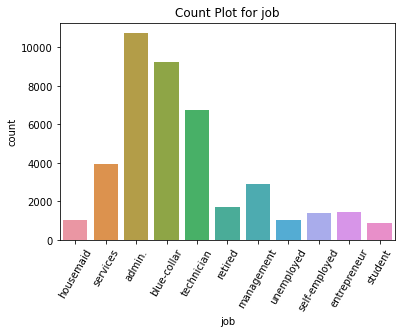

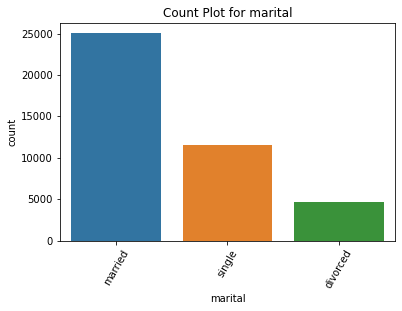

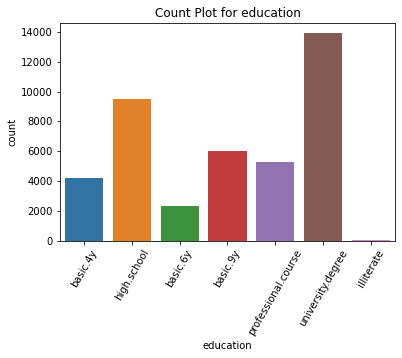

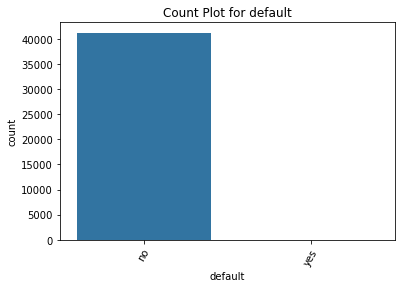

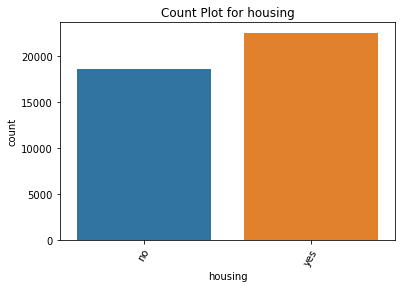

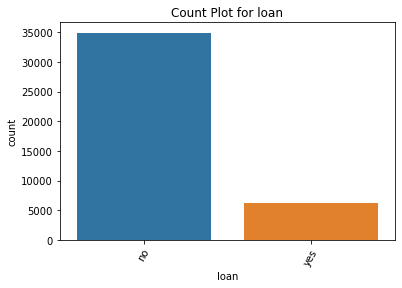

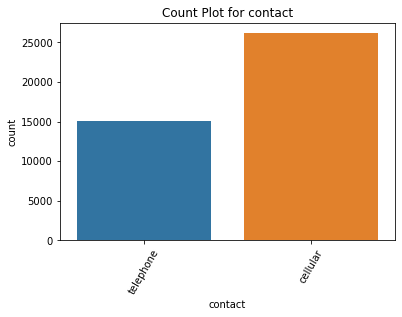

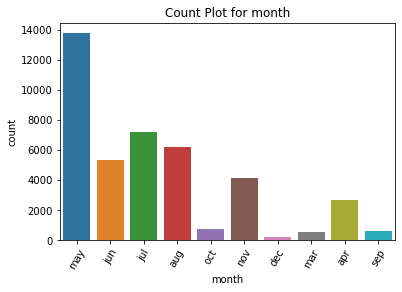

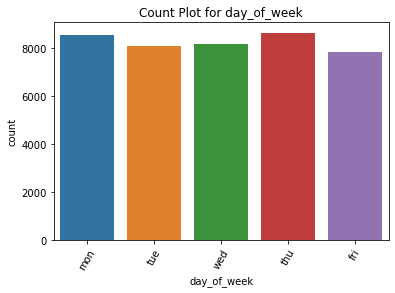

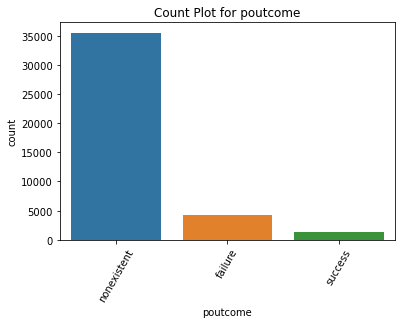

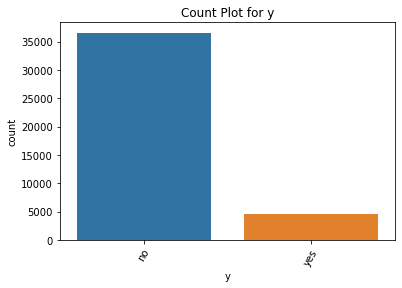

In [9]:
for column in df.columns:
    if df[column].dtype == 'object':  # Check if the column is non-numeric
        sns.countplot(x=df[column])
        plt.title(f'Count Plot for {column}')
        plt.xticks(rotation=60)  # Adjust the rotation angle as needed
        plt.show()

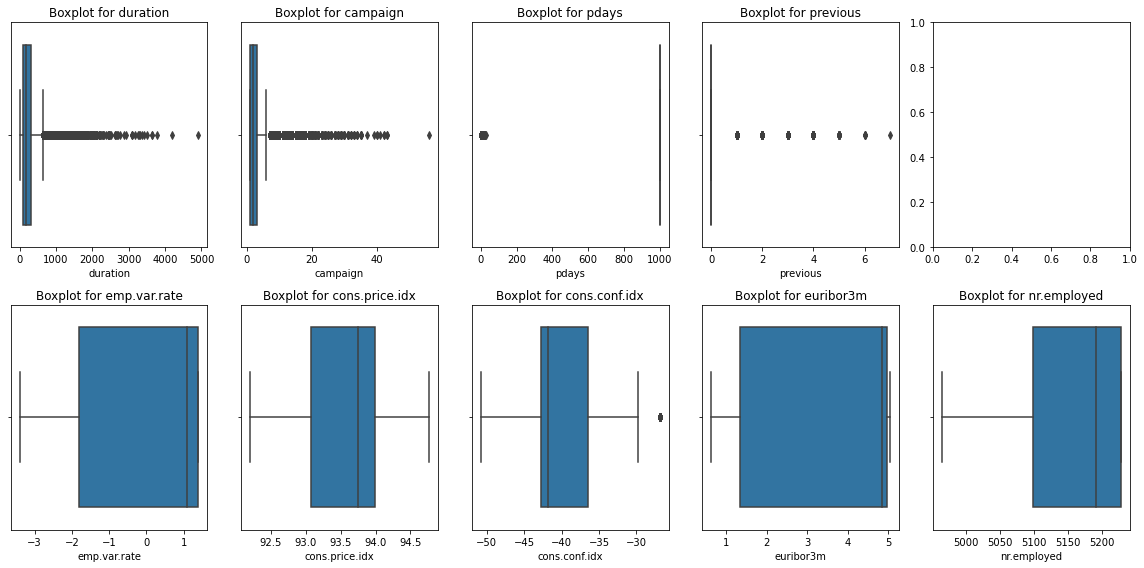

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt



# Specify the integer and float columns
int_columns = ['duration','campaign', 'pdays', 'previous']
float_columns = ['emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(16, 8))

# Plot boxplots for integer columns
for i, column in enumerate(int_columns):
    if df[column].dtype in ['int64', 'float64']:
        sns.boxplot(x=df[column], ax=axes[0, i])
        axes[0, i].set_title(f'Boxplot for {column}')

# Plot boxplots for float columns
for i, column in enumerate(float_columns):
    if df[column].dtype in ['int64', 'float64']:
        sns.boxplot(x=df[column], ax=axes[1, i])
        axes[1, i].set_title(f'Boxplot for {column}')

plt.tight_layout()
plt.show()


### Measuring skewness indicates the symmetry of that distribution


In [15]:
from scipy.stats import skew


numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns

for column in numeric_columns:
    skewness = skew(df[column])
    print(f"Skewness for '{column}': {skewness}")
    
 
    if skewness > 0:
        print("Positive skewness: The distribution is skewed to the right (tail on the right).")
    elif skewness < 0:
        print("Negative skewness: The distribution is skewed to the left (tail on the left).")
    else:
        print("Zero skewness: The distribution is perfectly symmetrical.")


Skewness for 'age': 0.7846682380932289
Positive skewness: The distribution is skewed to the right (tail on the right).
Skewness for 'duration': 3.2630224157610432
Positive skewness: The distribution is skewed to the right (tail on the right).
Skewness for 'campaign': 4.762333252560971
Positive skewness: The distribution is skewed to the right (tail on the right).
Skewness for 'pdays': -4.922010656450045
Negative skewness: The distribution is skewed to the left (tail on the left).
Skewness for 'previous': 3.8319026847007014
Positive skewness: The distribution is skewed to the right (tail on the right).
Skewness for 'emp.var.rate': -0.7240691785977529
Negative skewness: The distribution is skewed to the left (tail on the left).
Skewness for 'cons.price.idx': -0.23087924271991117
Negative skewness: The distribution is skewed to the left (tail on the left).
Skewness for 'cons.conf.idx': 0.3031688173189229
Positive skewness: The distribution is skewed to the right (tail on the right).
Skewn

In [10]:
duplicate_rows = df[df.duplicated()]

# Display the duplicate rows
print("Duplicate Rows except first occurrence:")
print(duplicate_rows)

Duplicate Rows except first occurrence:
       age          job   marital            education default housing loan  \
1266    39  blue-collar   married             basic.6y      no      no   no   
12261   36      retired   married                 <NA>      no      no   no   
14234   27   technician    single  professional.course      no      no   no   
16956   47   technician  divorced          high.school      no     yes   no   
18465   32   technician    single  professional.course      no     yes   no   
20216   55     services   married          high.school    <NA>      no   no   
20534   41   technician   married  professional.course      no     yes   no   
25217   39       admin.   married    university.degree      no      no   no   
28477   24     services    single          high.school      no     yes   no   
32516   35       admin.   married    university.degree      no     yes   no   
36951   45       admin.   married    university.degree      no      no   no   
38281   71  

In [33]:
duplicates_with_original = df[df.duplicated(keep=False)]

# Get the indices of the original rows
original_indices = df[~df.duplicated(keep=False)].index

# Display the original indices along with the duplicated rows
print("Original Indices for Duplicated Rows:")
print(original_indices)
print("\nDuplicated Rows:")
print(duplicates_with_original)
# Keep the first occurrence of duplicates
df_first_occurrence = df.drop_duplicates(keep='first')

# Display the DataFrame with only the first occurrence of duplicates
print("DataFrame with First Occurrence of Duplicates:")
print(df_first_occurrence)


Original Indices for Duplicated Rows:
Int64Index([], dtype='int64')

Duplicated Rows:
   loan
0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
DataFrame with First Occurrence of Duplicates:
   loan
0   NaN


In [38]:
df['housing'] = df['housing'].replace({'yes': 1, 'no': 0})

# Display the resulting DataFrame
print(df['housing'])
df['loan'] = df['loan'].replace({'yes': 1, 'no': 0})

# Display the resulting DataFrame
print(df['loan'])


0        0.0
1        0.0
2        1.0
3        0.0
4        0.0
        ... 
41183    1.0
41184    0.0
41185    1.0
41186    0.0
41187    1.0
Name: housing, Length: 41188, dtype: float64
0        0.0
1        0.0
2        0.0
3        0.0
4        1.0
        ... 
41183    0.0
41184    0.0
41185    0.0
41186    0.0
41187    0.0
Name: loan, Length: 41188, dtype: float64


In [204]:
# Remobving Duplicates
df= df.drop_duplicates()

In [205]:
print(df.isna().sum())

age                  0
job                330
marital             80
education         1730
default           8596
housing            990
loan               990
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64


In [206]:
# Method 1: Replacing unknown with mode(most frequent) value 
# By Aysha Abdul Azeez
columns_nan = ['job', 'marital', 'education', 'default', 'housing', 'loan']      # columns containing NaN
impute = SimpleImputer(strategy='most_frequent')                                 # Impute with mode


In [207]:
df_mode_imputed = df.copy()
for col in columns_nan:
    df_mode_imputed[col] = imputer.fit_transform(df_mode_imputed[[col]])

In [209]:
print(f'NA count before Imputation:\n{df[columns_nan].isna().sum()}')
print(f'\nNA count after mode Imputation:\n{df_mode_imputed[columns_nan].isna().sum()}')

NA count before Imputation:
job           330
marital        80
education    1730
default      8596
housing       990
loan          990
dtype: int64

NA count after mode Imputation:
job          0
marital      0
education    0
default      0
housing      0
loan         0
dtype: int64


In [198]:
df_mode_imputed

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [ ]:
# Review for Method 1 by Nrusimha Saraswati Sai Teja Jampani
# The approach was made rather simpler by good use of sklearn library instead of complicating 
# things by finding mode for each column. I can see that the the NAs are replaced by most frequest value
# appearing in the column. This method can introduce some bias but has to be verified buring testing

In [210]:
# Method 2: Imputing unknown with Random sample values
# By Purvesh Mehta
df_random_imputed = df.copy()


In [211]:
for col in columns_nan:
    col_unique_values = df_random_imputed[col].dropna().unique()
    df_random_imputed[col] = df_random_imputed[col].apply(lambda x: np.random.choice(col_unique_values) if pd.isnull(x) else x)

In [212]:
print(f'NA count before Imputation:\n{df[columns_nan].isna().sum()}')
print(f'\nNA count after Random Imputation:\n{df_random_imputed[columns_nan].isna().sum()}')

NA count before Imputation:
job           330
marital        80
education    1730
default      8596
housing       990
loan          990
dtype: int64

NA count after Random Imputation:
job          0
marital      0
education    0
default      0
housing      0
loan         0
dtype: int64


In [81]:
df_random_imputed

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,yes,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [ ]:
# Review for Method 2 by Aysha Abdul Azeez
# I understand that since only categorical columns contain NA values, it would be wise enough to do a random 
# sampling of the values and replace the NAs with random values instead of other methods like imputing with mean 
# or median. There can be inconsistency in the prediction since the values imputed can be too random for the model
# to produce optimal results

In [213]:
# Method 3: Model based imputing using KNN
# By Nrusimha Saraswati Sai Teja Jampani
df_model_imputed = df.copy()
categorical_cols = list(df.select_dtypes(include=['object']).columns)
print(cat_cols)

['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']


In [214]:
label_encoder = LabelEncoder()

for col in categorical_cols:
    df_model_imputed[col] = label_encoder.fit_transform(df_model_imputed[col].astype(str))
    
for col in columns_nan:
    
    df_train = df_model_imputed.dropna(subset=[col])     # Create a DataFrame with non-missing values for training the model
    
    X_train = df_train.drop(col, axis=1)                 # Separate features and target variable
    y_train = df_train[col]                              # Take all other columns as features and current NA valued column as target
    
    rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)     # Create a random forest classifier
    
    rf_classifier.fit(X_train, y_train)                 # Fit the model
    
    missing_rows = df_model_imputed[df_model_imputed[col].isna()]      # Identify rows with missing values in the target column
    
    # Predict missing values
    if not missing_rows.empty:
        X_missing = missing_rows.drop(col, axis=1)
        predicted_values = rf_classifier.predict(X_missing)
        
        df_model_imputed.loc[missing_rows.index, column] = predicted_values  # Fill in missing values


In [215]:
print(f'NA count before Imputation:\n{df[columns_nan].isna().sum()}')
print(f'\nNA count after Model based Imputation:\n{df_model_imputed[columns_nan].isna().sum()}')

NA count before Imputation:
job           330
marital        80
education    1730
default      8596
housing       990
loan          990
dtype: int64

NA count after Model based Imputation:
job          0
marital      0
education    0
default      0
housing      0
loan         0
dtype: int64


In [ ]:
# Review for Method 3 by Purvesh Mehta
# Appriciate the use of all other columns for predicting the NA values. But some of the columns may have
# weak relationship with the target column and may just add computational complexity. Randomforest can be a good option,
# however, other exploring other models too might give good results

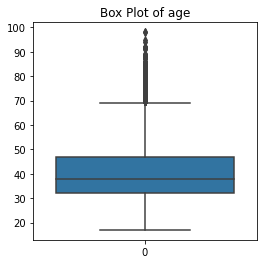

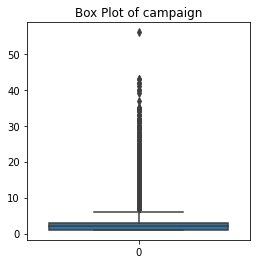

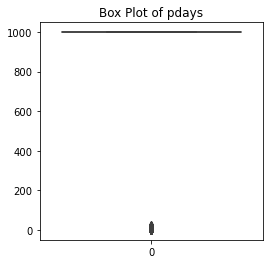

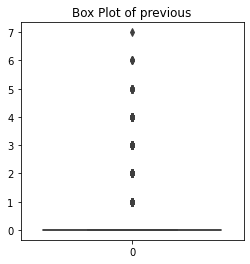

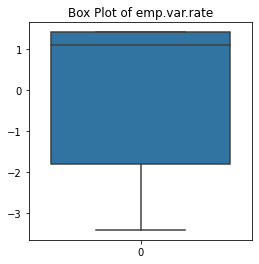

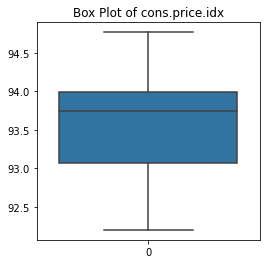

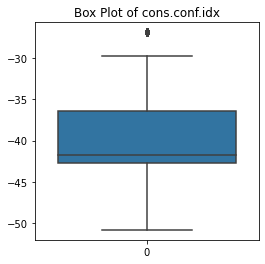

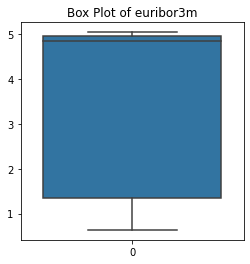

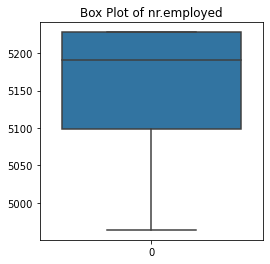

In [145]:
# Handling Outliers
# Box plots to visualize outliers
numeric_variables = ['age', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

for col in numeric_variables:
    plt.figure(figsize=(4, 4))
    sns.boxplot(data=df[col])
    plt.title(f'Box Plot of {col}')
    plt.show()

In [ ]:
# Age, campaign and cons.conf.idx contains outliers

In [ ]:
# Method 1: Trimming the outlier values
# By Purvesh Mehta

In [160]:
outlier_cols = ['age', 'campaign','cons.conf.idx']
df_trimmed = df.copy()
for col in outlier_cols:
    q1 = df_trimmed[col].quantile(0.25)
    q3 = df_trimmed[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    df_trimmed[col] = df_trimmed[col].clip(lower=lower_bound, upper=upper_bound)

9.5 69.5
-2.0 6.0
-52.150000000000006 -26.949999999999992


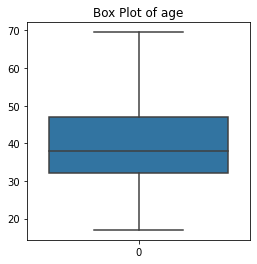

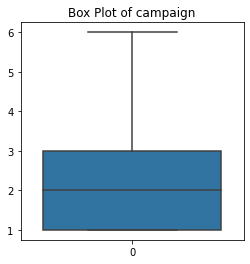

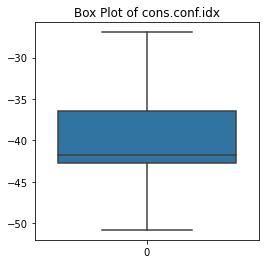

In [161]:
for col in outlier_cols:
    plt.figure(figsize=(4, 4))
    sns.boxplot(data=df_trimmed[col])
    plt.title(f'Box Plot of {col}')
    plt.show()


In [ ]:
# Method1 review by Aysha Abdul Azeez
# Trimming seem to be very strict on the outliers. All the outliers determined by the boxplot
# are now trimmed to upper or lower quartile. Functioning is implemented well enough

In [ ]:
# Method 2: Log Transformation
# By Nrusimha Saraswati Sai Teja Jampani

In [187]:
df_log_transformed = df.copy()
df_log_transformed['cons.conf.idx']= df_log_transformed['cons.conf.idx'] + abs(df['cons.conf.idx'].min()) + 1 # Make negative values positive

In [188]:
df_log_transformed[outlier_cols] = np.log1p(df_log_transformed[outlier_cols]) # apply log transformation

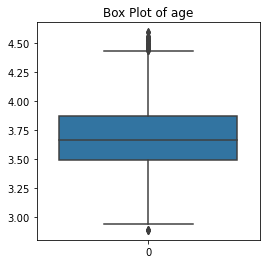

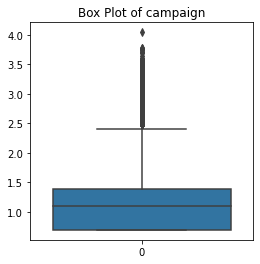

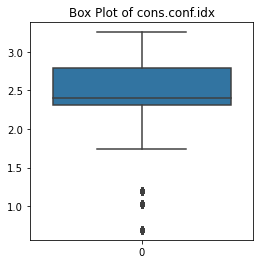

In [192]:
for col in outlier_cols:
    plt.figure(figsize=(4, 4))
    sns.boxplot(data=df_log_transformed[col])
    plt.title(f'Box Plot of {col}')
    plt.show()

In [ ]:
# Method 2 Review by Purvesh Mehta
# Log transformation is not eliminating all the outliers but instead eliminating the skewness in the data
# and narrowing down the data distribution. Since it cannot handle negative values, any negative values are converted to
# positive

In [ ]:
# Method 3: Box Cox transformation

In [184]:
df_boxcox_transformed = df.copy()

In [185]:
df_boxcox_transformed['cons.conf.idx']= df_boxcox_transformed['cons.conf.idx'] + abs(df['cons.conf.idx'].min()) + 1   #Make negative values positive
for col in outlier_cols:
    df_boxcox_transformed[col], _ = boxcox(df_boxcox_transformed[col] + 1)  # Adding constant 1 to handle zero and negative values

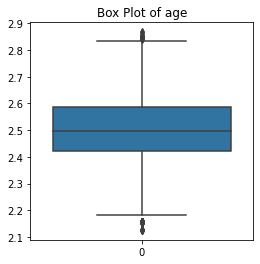

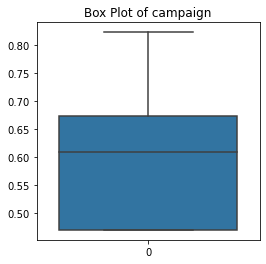

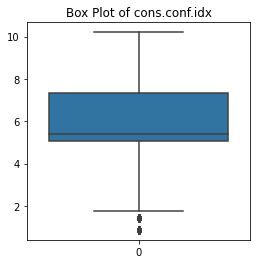

In [191]:
for col in outlier_cols:
    plt.figure(figsize=(4, 4))
    sns.boxplot(data=df_boxcox_transformed[col])
    plt.title(f'Box Plot of {col}')
    plt.show()

In [ ]:
# Method 3 review by Nrusimha Saraswati Sai Teja Jampani
# Boxcox transformation too is trying to reduce the skewness in the data but in a more symmetric way compared 
# to the log transformation. The results and outliers are handled in a more better way